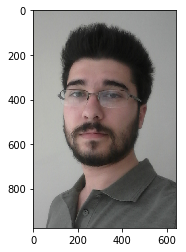

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image=cv2.imread("image.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)

# HİGH PASS FİLTER - KENARLAR İÇİN

## Resimi Griye Çevirme

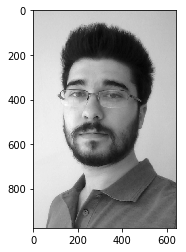

In [6]:
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap="gray")

In [ ]:
## Kenar Bulma Fİltresi

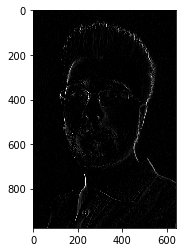

In [19]:
#Sobel Filtresi
kernel=np.array([[-1,0,1],
                [-2,0,2],
                 [-1,0,1]])
#filter2d(grayscale image, bit=depth, kernel)
filtered_image=cv2.filter2D(gray, -1, kernel)
plt.imshow(filtered_image,cmap="gray")

In [ ]:
## Create Binary İmage

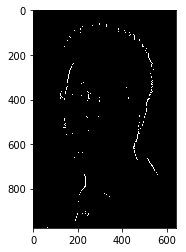

In [14]:
#filterelenmiş pikselleri beyaz yapıyoruz.
#threshold(image,eşik değeri,renk kodu,thresbinary)
retval,bin_image=cv2.threshold(filtered_image,75,255,cv2.THRESH_BINARY)

plt.imshow(bin_image,cmap="gray")

# LOW PASS FİLTER - Blur/Smooth images, gürültüyü azaltır (Yüksek frekans gürültüsü)

## Gaussian Blur

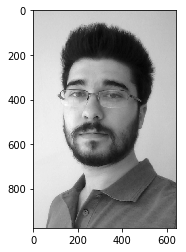

In [16]:
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
gray_blur=cv2.GaussianBlur(gray,(5,5), 0)
plt.imshow(gray,cmap="gray")

Text(0.5, 1.0, 'Blursuz')

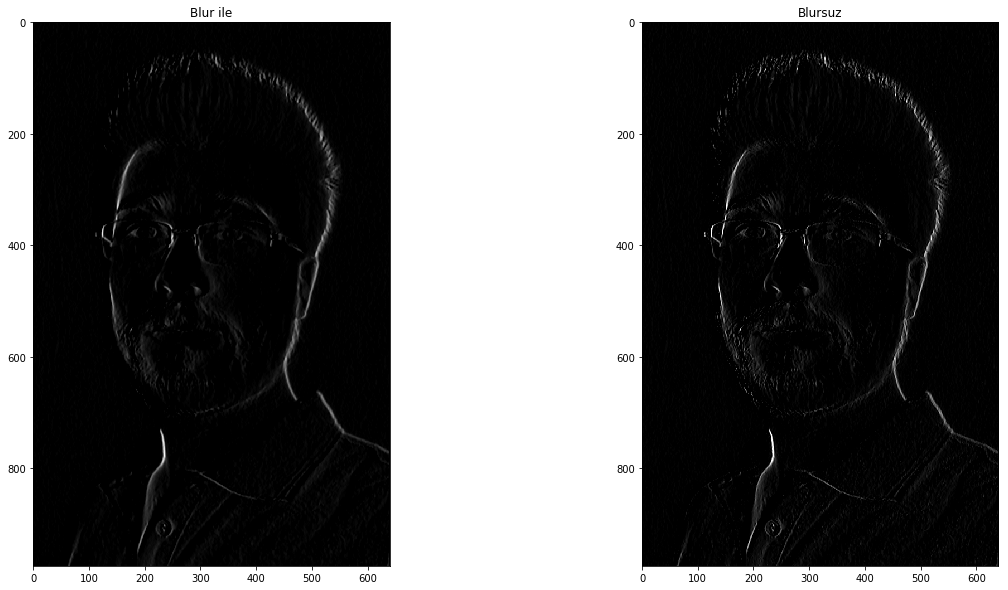

In [25]:
kernel=np.array([[-1,0,1],
                [-2,0,2],
                 [-1,0,1]])
#filter2d(grayscale image, bit=depth, kernel)
filtered_image_blur=cv2.filter2D(gray_blur, -1, kernel)
f,( ax1,ax2) =plt.subplots(1,2,figsize=(20,10))
ax1.imshow(filtered_image_blur,cmap="gray")
ax1.set_title("Blur ile")
ax2.imshow(filtered_image,cmap="gray")
ax2.set_title("Blursuz")
#Daha smooth ve gürültüsüz bir sonuç elde ediyoruz.

# Canny Edge Detector

1. Gürültü azaltır - Gaussian Blur
2. Dikey ve Yatay kenarları bulur. - Sobel Filtreleri
3. Non maximum suppresion uygular
4. Hysteresis algoritması ile en iyi kenarları bulur.


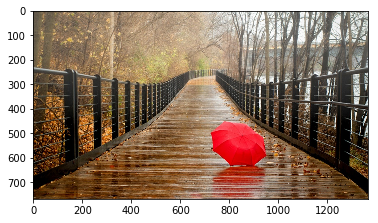

In [26]:
image=cv2.imread("manzara.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

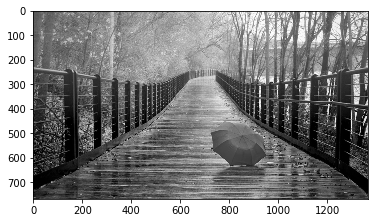

In [27]:
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap="gray")

## Canny Edge Detection yapma

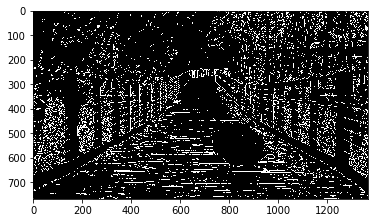

In [28]:
lower=120
upper=240

edges=cv2.Canny(gray,lower,upper)
plt.imshow(edges,cmap="gray")

### Geniş ve Dar Canny uygulamak.

Text(0.5, 1.0, 'Tight')

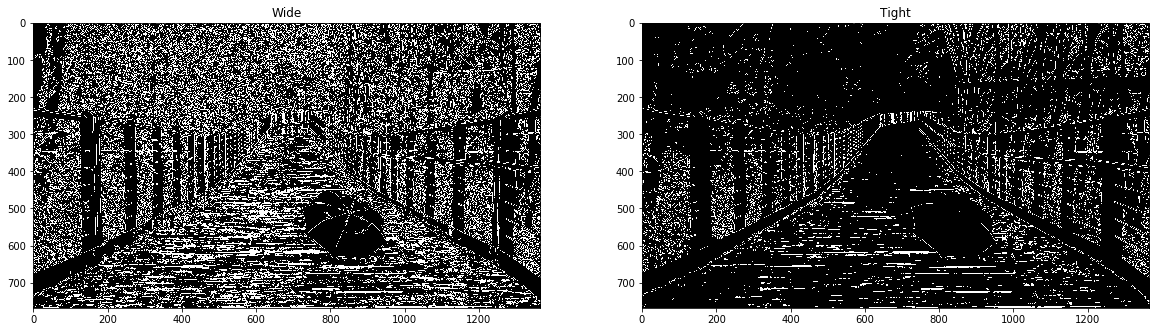

In [34]:
wide=cv2.Canny(gray,30,100)
tight=cv2.Canny(gray,180,240)

f,( ax1,ax2) =plt.subplots(1,2,figsize=(20,10))
ax1.imshow(wide,cmap="gray")
ax1.set_title("Wide")
ax2.imshow(tight,cmap="gray")
ax2.set_title("Tight")

# Hough Lines

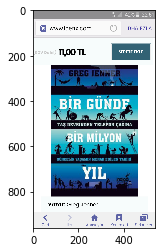

In [66]:
kitap=cv2.imread("kitap.png")
kitap=cv2.cvtColor(kitap,cv2.COLOR_BGR2RGB)
plt.imshow(kitap)

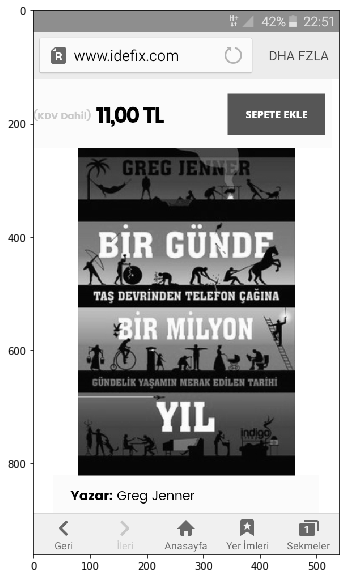

In [67]:
gray=cv2.cvtColor(kitap,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(20,10))
plt.imshow(gray,cmap="gray")

## Perform Edge Detection

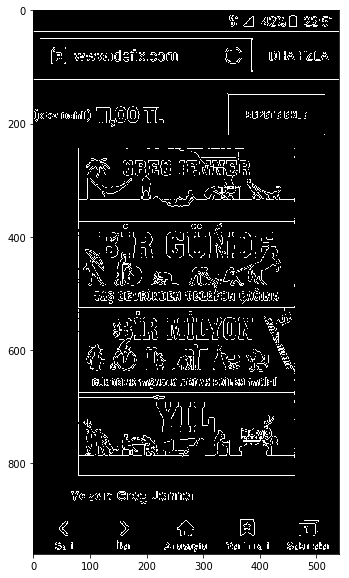

In [73]:
lower=50
upper=100
edges=cv2.Canny(gray,lower,upper)
plt.figure(figsize=(20,10))
plt.imshow(edges,cmap="gray")

## Hough Transform ile Çizgileri Bulma

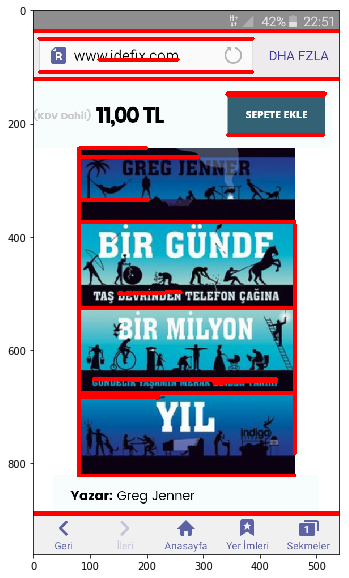

In [90]:
#Hough Parametreleri
rho=1
theta=np.pi/180
threshold=60
min_line_length=100
max_line_gap=5
lines=cv2.HoughLinesP(edges,rho,theta,threshold,np.array([]),
                      min_line_length,max_line_gap)
line_image=kitap.copy()

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
plt.figure(figsize=(20,10))
plt.imshow(line_image)